connect to database successfully
CellName=RS54ML1811
StartDate("YYYY-MM-DD")=2018-02-02


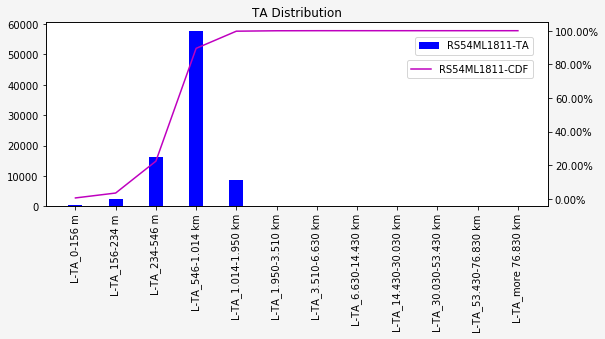

In [3]:
#CELL LEVEL COVERAGE CHECK
import pymysql.cursors
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick 
import numpy as np
%matplotlib inline

connection = pymysql.connect(host='localhost',
                             user='Test',
                             password='1234',
                             db='sts',
                             charset='utf8mb4',
                             cursorclass=pymysql.cursors.DictCursor)
if connection:
    print("connect to database successfully")
    
try:
    with connection.cursor() as cursor:
        # Read a single record
        CELLNAME=input("CellName=")
        CELLNAME=CELLNAME.strip().upper()
        StartDate=input("StartDate(\"YYYY-MM-DD\")=")
        StartDate=StartDate.strip()
        sql1 =("SELECT * FROM `daily_cell_lte_5.1` WHERE Time>= \'"+StartDate+"\'and CELLNAME=\'"+CELLNAME+"\' GROUP BY Time ASC")
        cursor.execute(sql1)
        result1 = cursor.fetchall()
        sql2 =("SELECT * FROM `daily_cell_sts_5.2` WHERE Time>= \'"+StartDate+"\'and CELLNAME=\'"+CELLNAME+"\' GROUP BY Time ASC")
        cursor.execute(sql2)
        result2 = cursor.fetchall()
        if not (result1 or result2):
            print("Query result is empty")
except:
    print("Error occured when querying")
finally:
    connection.close()
    
    
TA=['L-TA_0-156 m',
    'L-TA_156-234 m',
    'L-TA_234-546 m',
    'L-TA_546-1.014 km',
    'L-TA_1.014-1.950 km',
    'L-TA_1.950-3.510 km',
    'L-TA_3.510-6.630 km',
    'L-TA_6.630-14.430 km',
    'L-TA_14.430-30.030 km', 
    'L-TA_30.030-53.430 km',
    'L-TA_53.430-76.830 km', 
    'L-TA_more 76.830 km']
TP=['VS.TP.UE.0',
    'VS.TP.UE.1',
    'VS.TP.UE.2',
    'VS.TP.UE.3',
    'VS.TP.UE.4',
    'VS.TP.UE.5',
    'VS.TP.UE.6.9',
    'VS.TP.UE.10.15(times)',
    'VS.TP.UE.16.25',
    'VS.TP.UE.26.35',
    'VS.TP.UE.36.55',
    'VS.TP.UE.More55']
TP_dis=['0-234 m',
        '234-468 m',
        '468-702 m',
        '702-936 m',
        '0.936-1.17 km',
        '1.17-1.4 km',
        '1.4-2.1 km',
        '2.34-3.74 km',
        '3.74-6.084 km',
        '6.084-8.424 km',
        '8.424-13.1 km',
        '> 13.104 km']

if result1:
    df=pd.DataFrame(result1)
    #生成TA图    
    distance=[]
    ta_cell_text=[]
    ta_cdf_daily=[]
    date_range=df['Time'].values.tolist()  #时间轴序列
    
    #生成表格值
    for date in date_range:
        df_time=df[df.Time==date]
        temp=[]
        for ta_1 in TA:
            temp.append(int(df_time[ta_1].values.tolist()[0]))
        total_temp=sum(temp)
        ta_cdf_daily_temp=np.cumsum([int(i*100/total_temp) for i in temp])
        ta_cdf_daily.append(ta_cdf_daily_temp)
        ta_cell_text.append(temp)     
    bar_width=0.35
    #x轴序列
    km=[x+1 for x in range(12)]
    #值序列
    for ta in TA:
        distance.append(df[ta].values.sum())
    #生成CDF    
    total=sum(distance)
    cdf=np.cumsum([x*100/total for x in distance])
    
    fig_ta=plt.figure(figsize=(9,3.5),facecolor='whitesmoke')
    ax1=fig_ta.add_subplot(111)
    ax1.bar(km,distance,bar_width,color='b',label=CELLNAME+'-TA')
    
    #设置坐标轴间隔为1
    start, end = ax1.get_xlim()
    ax1.xaxis.set_ticks(np.arange(start, end, 1))
    plt.xticks(km,TA,rotation=90)
    ax1.set(title='TA Distribution')
    
    #设置双坐标轴，右侧Y轴 
    ax2=ax1.twinx()
    ax2.plot(km,cdf,'m-',label=CELLNAME+'-CDF')
    #坐标轴设置为百分比显示
    fmt='%.2f%%' 
    yticks = mtick.FormatStrFormatter(fmt) 
    ax2.yaxis.set_major_formatter(yticks) 

    ax1.legend(loc=1,bbox_to_anchor=(0.98,0.95))
    ax2.legend(loc=1,bbox_to_anchor=(0.98,0.82))
    plt.subplots_adjust(bottom=0.15)
    plt.show()
    
if result2:
    df=pd.DataFrame(result2)
    #生成TP图    
    distance=[]
    tp_cell_text=[]
    tp_cdf_daily=[]
    date_range=df['Time'].values.tolist()  #时间轴序列
    
    #生成表格值
    for date in date_range:
        df_time=df[df.Time==date]
        temp=[]
        for tp_1 in TP:
            temp.append(int(df_time[tp_1].values.tolist()[0]))
        total_temp=sum(temp)
        tp_cdf_daily_temp=np.cumsum([int(i*100/total_temp) for i in temp])
        tp_cdf_daily.append(tp_cdf_daily_temp)
        tp_cell_text.append(temp)         
    
    bar_width=0.35
    #x轴序列
    km=[x+1 for x in range(12)]
    #值序列
    for tp in TP:
        distance.append(df[tp].values.sum())
    #生成CDF    
    total=sum(distance)
    cdf=np.cumsum([x*100/total for x in distance])
    
    fig_tp=plt.figure(figsize=(9,3.5),facecolor='whitesmoke')
    ax1=fig_tp.add_subplot(111)
    ax1.bar(km,distance,bar_width,color='b',label=CELLNAME+'-TP')
    
    #设置坐标轴间隔为1
    start, end = ax1.get_xlim()
    ax1.xaxis.set_ticks(np.arange(start, end, 1))
    plt.xticks(km,TP_dis,rotation=90)
    plt.title('TP Distribution')
    
    #设置双坐标轴，右侧Y轴 
    ax2=ax1.twinx()
    ax2.plot(km,cdf,'m-',label=CELLNAME+'-CDF')
    #坐标轴设置为百分比显示
    fmt='%.2f%%' 
    yticks = mtick.FormatStrFormatter(fmt) 
    ax2.yaxis.set_major_formatter(yticks) 

    ax1.legend(loc=1,bbox_to_anchor=(0.98,0.95))
    ax2.legend(loc=1,bbox_to_anchor=(0.98,0.82))
    plt.subplots_adjust(bottom=0.15)
    plt.show()

In [5]:
#TA分布
df_TA=pd.DataFrame(ta_cell_text,index=date_range,columns=TA)
df_TA

,L-TA_0-156 m,L-TA_156-234 m,L-TA_234-546 m,L-TA_546-1.014 km,L-TA_1.014-1.950 km,L-TA_1.950-3.510 km,L-TA_3.510-6.630 km,L-TA_6.630-14.430 km,L-TA_14.430-30.030 km,L-TA_30.030-53.430 km,L-TA_53.430-76.830 km,L-TA_more 76.830 km
2018-02-02,501,2505,16268,57632,8773,213,32,3,0,0,0,0


In [4]:
#TA CDF   
df_TA_cdf=pd.DataFrame(ta_cdf_daily,index=date_range,columns=TA)
df_TA_cdf

,L-TA_0-156 m,L-TA_156-234 m,L-TA_234-546 m,L-TA_546-1.014 km,L-TA_1.014-1.950 km,L-TA_1.950-3.510 km,L-TA_3.510-6.630 km,L-TA_6.630-14.430 km,L-TA_14.430-30.030 km,L-TA_30.030-53.430 km,L-TA_53.430-76.830 km,L-TA_more 76.830 km
2018-02-02,0,2,20,87,97,97,97,97,97,97,97,97


In [ ]:
#TP
df_TP=pd.DataFrame(tp_cell_text,index=date_range,columns=TP_dis)
df_TP

In [ ]:
#TP CDF
df_TP_cdf=pd.DataFrame(tp_cdf_daily,index=date_range,columns=TP_dis)
df_TP_cdf